In [1]:
import sys
sys.path.append("/home/sgiorgi/release/python3")

from dlatk.mysqlMethods import mysql_iter_funcs as mif

In [2]:
import pandas as pd

In [3]:
db = "emp_test"
feat_tbl = "feat$p_ridg_empPred2000$msgs_uniq_en$user_id"
index = "user_id"

db_eng = mif.get_db_engine(db)

In [78]:
read_sql = """SELECT group_id as user_id, feat, group_norm  FROM %s""" % (feat_tbl)
feat_df = pd.read_sql(sql=read_sql, con=db_eng, index_col=index)

In [79]:
feat_df = feat_df.reset_index()
feat_df = feat_df.pivot('user_id', 'feat', 'group_norm')

In [6]:
feat_df.columns = ['path_lbp', 'sal_lbp']
feat_df.head()

path_lbp   sal_lbp
user_id                                                               
013975bfda9c6a8c219b514233928c70bcecef7282bfdc6... -0.415235 -0.317296
015be1f8b06fc6cac2496a28ab076f13a88fd339711e82b...  0.288247  0.381143
01aa1c95b9df3df92c8cbbf01c5ff255df196871e4e18d8...  0.019033  0.060592
024fcf5fdaf1d76ec902444b2ce099137da3fa09dcbd676...  0.167018  0.301265
02792f13b7b8d4c55d98ce8f28b4c601ddc353951fb5050... -0.176921 -0.149786

In [7]:
out_tbl = "emp_merged_uniq_test"
out_sql = """SELECT user_id, stress_scale, path_jord_ispt, sal_ec_iopt FROM %s""" % (out_tbl)
out_df = pd.read_sql(sql=out_sql, con=db_eng, index_col=index)

In [8]:
out_df.corr()

stress_scale  path_jord_ispt  sal_ec_iopt
stress_scale        1.000000        0.243198     0.033423
path_jord_ispt      0.243198        1.000000     0.462797
sal_ec_iopt         0.033423        0.462797     1.000000

In [9]:
combined = pd.concat([out_df, feat_df], axis=1)

In [10]:
combined.head()

stress_scale  \
013975bfda9c6a8c219b514233928c70bcecef7282bfdc6...           4.0   
015be1f8b06fc6cac2496a28ab076f13a88fd339711e82b...           3.9   
01aa1c95b9df3df92c8cbbf01c5ff255df196871e4e18d8...           1.9   
024fcf5fdaf1d76ec902444b2ce099137da3fa09dcbd676...           3.9   
02792f13b7b8d4c55d98ce8f28b4c601ddc353951fb5050...           2.2   

                                                    path_jord_ispt  \
013975bfda9c6a8c219b514233928c70bcecef7282bfdc6...       -0.031210   
015be1f8b06fc6cac2496a28ab076f13a88fd339711e82b...        0.444704   
01aa1c95b9df3df92c8cbbf01c5ff255df196871e4e18d8...       -0.427974   
024fcf5fdaf1d76ec902444b2ce099137da3fa09dcbd676...        0.606865   
02792f13b7b8d4c55d98ce8f28b4c601ddc353951fb5050...       -1.135282   

                                                    sal_ec_iopt  path_lbp  \
013975bfda9c6a8c219b514233928c70bcecef7282bfdc6...     0.624381 -0.415235   
015be1f8b06fc6cac2496a28ab076f13a88fd339711e82b...    -0.668633  0.288247   
01aa1c95b9df3df92c8cbbf01c5ff255df196871e4e18d8...     0.221721  0.019033   
024fcf5fdaf1d76ec902444b2ce099137da3fa09dcbd676...     0.429614  0.167018   
02792f13b7b8d4c55d98ce8f28b4c601ddc353951fb5050...    -0.507644 -0.176921   

                                                     sal_lbp  
013975bfda9c6a8c219b514233928c70bcecef7282bfdc6... -0.317296  
015be1f8b06fc6cac2496a28ab076f13a88fd339711e82b...  0.381143  
01aa1c95b9df3df92c8cbbf01c5ff255df196871e4e18d8...  0.060592  
024fcf5fdaf1d76ec902444b2ce099137da3fa09dcbd676...  0.301265  
02792f13b7b8d4c55d98ce8f28b4c601ddc353951fb5050... -0.149786

In [11]:
combined.corr()

stress_scale  path_jord_ispt  sal_ec_iopt  path_lbp   sal_lbp
stress_scale        1.000000        0.243198     0.033423  0.186290  0.056373
path_jord_ispt      0.243198        1.000000     0.462797  0.295193  0.244839
sal_ec_iopt         0.033423        0.462797     1.000000  0.176582  0.327657
path_lbp            0.186290        0.295193     0.176582  1.000000  0.724079
sal_lbp             0.056373        0.244839     0.327657  0.724079  1.000000

In [12]:
combined.corr()

stress_scale  path_jord_ispt  sal_ec_iopt  path_lbp   sal_lbp
stress_scale        1.000000        0.243198     0.033423  0.186290  0.056373
path_jord_ispt      0.243198        1.000000     0.462797  0.295193  0.244839
sal_ec_iopt         0.033423        0.462797     1.000000  0.176582  0.327657
path_lbp            0.186290        0.295193     0.176582  1.000000  0.724079
sal_lbp             0.056373        0.244839     0.327657  0.724079  1.000000

In [32]:
connection = db_eng.connect()

In [42]:
def write_new_columns(connection, df, table, columns, index):
    for column in columns:
        write_sql = """UPDATE {table} SET {col} = %s where {idx} = %s""".format(table=table, col=column, idx=index)
        data = df[column].to_dict()
        connection.execute(write_sql, [(v,k) for k,v in data.items()])
        print("Added column %s." % column)

In [43]:
write_new_columns(connection=connection, df=feat_df, table="emp_merged_uniq_test", columns=['path_lbp', 'sal_lbp'], index="user_id")

Added column path_lbp.
Added column sal_lbp.


In [51]:
dem_sql = "select group_id as user_id, feat, group_norm from feat$p_ridg_empDem500$msgs_kw_emo_democrat$user_id"
rep_sql = "select group_id as user_id, feat, group_norm from feat$p_ridg_empRep500$msgs_kw_emo_republican$user_id"
index = "user_id"

In [52]:
dem_df = pd.read_sql(sql=dem_sql, con=db_eng, index_col=index)
rep_df = pd.read_sql(sql=rep_sql, con=db_eng, index_col=index)

In [53]:
dem_df = dem_df.reset_index()
dem_df = dem_df.pivot('user_id', 'feat', 'group_norm')
rep_df = rep_df.reset_index()
rep_df = rep_df.pivot('user_id', 'feat', 'group_norm')

In [56]:
dem_df.describe()

feat   path_jord_ispt  sal_ec_iopt
count     4868.000000  4868.000000
mean         0.003572     0.006487
std          0.097981     0.104517
min         -0.615809    -0.598282
25%         -0.053809    -0.047554
50%         -0.004977    -0.000856
75%          0.051700     0.051218
max          0.727585     1.039964

In [57]:
rep_df.describe()

feat   path_jord_ispt  sal_ec_iopt
count     3213.000000  3213.000000
mean         0.003572     0.006487
std          0.113868     0.129263
min         -0.548669    -0.789374
25%         -0.065543    -0.070900
50%         -0.014222    -0.013084
75%          0.057132     0.063088
max          0.562146     0.816740

In [7]:
cnty_sql = "select group_id as cnty, feat, group_norm from feat$p_ridg_empCnty500$msgsEn25_twt_12to14_noRt$cnty"
index = "cnty"

In [8]:
cnty_df = pd.read_sql(sql=cnty_sql, con=db_eng, index_col=index)

In [9]:
cnty_df = cnty_df.reset_index()
cnty_df = cnty_df.pivot('cnty', 'feat', 'group_norm')

In [10]:
cnty_df.head()

feat  path_jord_ispt  sal_ec_iopt
cnty                             
1001        0.037292     0.034544
1003       -0.058557     0.010297
1005        0.014476     0.018844
1007        0.059843     0.087567
1009        0.064134     0.127749

In [5]:
cnty_out_sql = "select cnty, ExcessDrink_Percent, bachdegHC03_VC94ACS3yr$10, hsgradHC03_VC93ACS3yr$10, logincomeHC01_VC85ACS3yr$10, unemployAve_BLSLAUS$0910, MentallyUnhealthy_Days, AdultSmoke_Percent, NoSocialSupport_Percent from cnty_outcomes"
index = "cnty"
cnty_out_df = pd.read_sql(sql=cnty_out_sql, con=db_eng, index_col=index)

In [6]:
cnty_combined = pd.concat([cnty_df, cnty_out_df], axis=1)

NameError: name 'cnty_df' is not defined

In [87]:
cnty_out_df.head()

ExcessDrink_Percent  bachdegHC03_VC94ACS3yr$10  \
cnty                                                   
1001                 17.0                       22.9   
1003                 18.0                       27.1   
1005                 14.0                       14.4   
1007                 11.0                        9.4   
1009                  6.0                       13.0   

      hsgradHC03_VC93ACS3yr$10  logincomeHC01_VC85ACS3yr$10  \
cnty                                                          
1001                      85.2                      4.74166   
1003                      87.3                      4.69902   
1005                      73.2                      4.52488   
1007                      74.4                      4.59797   
1009                      74.6                      4.63799   

      unemployAve_BLSLAUS$0910  MentallyUnhealthy_Days  AdultSmoke_Percent  \
cnty                                                                         
1001                      8.10                     3.6                22.0   
1003                      8.60                     3.8                21.0   
1005                     12.25                     4.3                25.0   
1007                     10.90                     5.1                26.0   
1009                      8.75                     3.9                21.0   

      NoSocialSupport_Percent  
cnty                           
1001                     24.0  
1003                     19.0  
1005                     18.0  
1007                     29.0  
1009                     14.0

In [77]:
cnty_combined.corr()[["path_jord_ispt", "sal_ec_iopt"]]

feat                         path_jord_ispt  sal_ec_iopt
feat                                                    
path_jord_ispt                     1.000000     0.620668
sal_ec_iopt                        0.620668     1.000000
ExcessDrink_Percent               -0.045139    -0.161494
bachdegHC03_VC94ACS3yr$10         -0.662286    -0.585728
hsgradHC03_VC93ACS3yr$10          -0.529540    -0.502804
logincomeHC01_VC85ACS3yr$10       -0.432267    -0.433334
unemployAve_BLSLAUS$0910          -0.023149     0.040806
MentallyUnhealthy_Days             0.064385     0.131308
AdultSmoke_Percent                 0.210243     0.180735
NoSocialSupport_Percent            0.062885     0.019061

In [81]:
connection = db_eng.connect()
for column in ["path_jord_ispt", "sal_ec_iopt"]:
    write_sql = """UPDATE {table} SET {col} = %s where {idx} = %s""".format(table="cnty_outcomes", col=column, idx="cnty")
    data = cnty_combined[column].to_dict()
    connection.execute(write_sql, [(v,k) for k,v in data.items()])
    print("Added column %s." % column)

/data/anaconda2/envs/dlatk/lib/python3.5/site-packages/MySQLdb/cursors.py:258: Warning: Data truncated for column 'path_jord_ispt' at row 1
  r = r + self.execute(query, a)


Added column path_jord_ispt.


/data/anaconda2/envs/dlatk/lib/python3.5/site-packages/MySQLdb/cursors.py:258: Warning: Data truncated for column 'sal_ec_iopt' at row 1
  r = r + self.execute(query, a)


Added column sal_ec_iopt.


In [98]:
stress_sql = """select t1.* from rieman.feat$p_elas_Stress_Fb500tCp_Gft500$msgsEn25_twt_12to14_noRt$cnty t1 inner join rieman.msgsEn25_twt_12to14_noRt_cnty_alloc t2 on t1.group_id = t2.cnty where t2.user_cnty_w >= 500;"""
stress_df = pd.read_sql(sql=stress_sql, con=db_eng, index_col="group_id")

In [101]:
stress_df = stress_df[["feat", "group_norm"]]
stress_df.index.names = ['cnty']
stress_df.head()

feat  group_norm
cnty                          
1001  stress_scale    2.810000
1003  stress_scale    2.703391
1015  stress_scale    2.780114
1033  stress_scale    2.769565
1043  stress_scale    2.753729

In [103]:
stress_df = stress_df.reset_index()
stress_df = stress_df.pivot('cnty', 'feat', 'group_norm')

In [105]:
connection = db_eng.connect()
for column in ["stress_scale"]:
    write_sql = """UPDATE {table} SET {col} = %s where {idx} = %s""".format(table="cnty_outcomes", col=column, idx="cnty")
    data = stress_df[column].to_dict()
    connection.execute(write_sql, [(v,k) for k,v in data.items()])
    print("Added column %s." % column)

Added column stress_scale.


In [106]:
cnty_combined = pd.concat([cnty_combined, stress_df], axis=1)

In [108]:
cnty_combined.corr()[["path_jord_ispt", "sal_ec_iopt", "stress_scale"]]

feat                         path_jord_ispt  sal_ec_iopt  stress_scale
feat                                                                  
path_jord_ispt                     1.000000     0.620668      0.898461
sal_ec_iopt                        0.620668     1.000000      0.722085
ExcessDrink_Percent               -0.045139    -0.161494     -0.189181
bachdegHC03_VC94ACS3yr$10         -0.662286    -0.585728     -0.659782
hsgradHC03_VC93ACS3yr$10          -0.529540    -0.502804     -0.451366
logincomeHC01_VC85ACS3yr$10       -0.432267    -0.433334     -0.281026
unemployAve_BLSLAUS$0910          -0.023149     0.040806      0.324562
MentallyUnhealthy_Days             0.064385     0.131308      0.326663
AdultSmoke_Percent                 0.210243     0.180735      0.394877
NoSocialSupport_Percent            0.062885     0.019061      0.335171
stress_scale                       0.898461     0.722085      1.000000

In [23]:
import scipy.stats

In [43]:
male_sql = """SELECT user_id, sal_ec_iopt, path_jord_ispt FROM emp_test.emp_merged_uniq where gender=1 and uwt >= 500"""
female_sql = """SELECT user_id, sal_ec_iopt, path_jord_ispt FROM emp_test.emp_merged_uniq where gender=2 and uwt >= 500"""

In [44]:
male_df = pd.read_sql(sql=male_sql, con=db_eng, index_col="user_id")
female_df = pd.read_sql(sql=female_sql, con=db_eng, index_col="user_id")

In [45]:
a = male_df['sal_ec_iopt'].values.tolist()
b = female_df['sal_ec_iopt'].values.tolist()[0:len(a)]
print(scipy.stats.ttest_ind(a,b,equal_var=True))
print(scipy.stats.ttest_ind(a,b,equal_var=False))
print(scipy.stats.ttest_rel(a,female_df['sal_ec_iopt'].values.tolist()[0:len(a)]))

Ttest_indResult(statistic=-6.6608172506811192, pvalue=3.9726327276540516e-11)
Ttest_indResult(statistic=-6.6608172506811192, pvalue=3.9805889522198469e-11)
Ttest_relResult(statistic=-6.7771184158430433, pvalue=2.7019861737479862e-11)


In [46]:
a = male_df['path_jord_ispt'].values.tolist()
b = female_df['path_jord_ispt'].values.tolist()[0:len(a)]
print(scipy.stats.ttest_ind(a,b,equal_var=True))
print(scipy.stats.ttest_ind(a,b,equal_var=False))
print(scipy.stats.ttest_rel(a,female_df['path_jord_ispt'].values.tolist()[0:len(a)]))

Ttest_indResult(statistic=-1.615133052462443, pvalue=0.10651870982731224)
Ttest_indResult(statistic=-1.615133052462443, pvalue=0.10652246906708439)
Ttest_relResult(statistic=-1.6150429425375219, pvalue=0.10677500734565448)


In [33]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
import matplotlib.patches as mpatches
#import mpld3
#mpld3.disable_notebook()

In [59]:
male_df = male_df[male_df.sal_ec_iopt != 1.1095891019]
female_df = female_df[female_df.sal_ec_iopt != 1.1095891019]
y_male = male_df['sal_ec_iopt'].values.tolist()
y_female = female_df['sal_ec_iopt'].values.tolist()

x_male = male_df['path_jord_ispt'].values.tolist()
x_female = female_df['path_jord_ispt'].values.tolist()
print(max(y_male), min(y_male), max(y_female), min(y_female))
print(max(x_male), min(x_male), max(x_female), min(x_female))

1.05635269762 -3.01379417636 1.05635269762 -3.01379417636
1.75089488542 -1.76804539668 1.75089488542 -1.76804539668


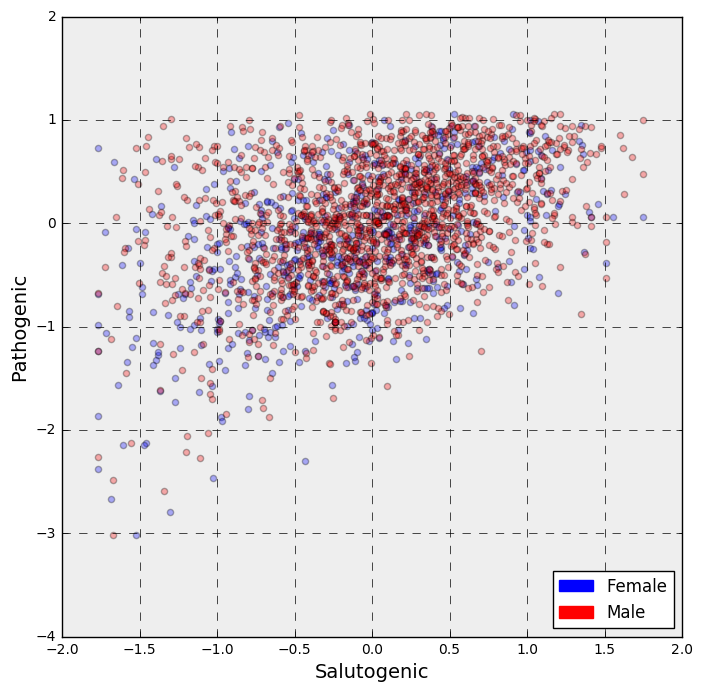

In [69]:
bound = 0.25

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'), figsize=(8,8))

#legend
path_red = mpatches.Patch(color='red', label='Male')
sal_blue = mpatches.Patch(color='blue', label='Female')

bscatter = ax.scatter(x_male, y_male, c='blue', alpha=0.3)
rscatter = ax.scatter(x_female, y_female, c='red', alpha=0.3)
plt.legend(handles=[sal_blue, path_red], loc = 'lower right')
plt.xlabel('Salutogenic', fontsize=14)
plt.ylabel('Pathogenic', fontsize=14)
ax.grid(True, color="black", linestyle="--")
#ax.set_xlim([-bound,bound])
#ax.set_ylim([-bound,bound])
#ax.set_axis_bgcolor('white')
#ax.get_xaxis().set_ticks([])
#ax.get_yaxis().set_ticks([])
#ax.get_yaxis().set_visible(False)
fig.savefig('gender.jpg')


In [22]:
import sys
sys.path.append("/home/sgiorgi/chorogrid-master")

In [23]:
from chorogrid import Colorbin, Chorogrid

In [24]:
#cnty_df.head()

In [25]:
mycolors = ["#fff7fb", "#ece2f0", "#d0d1e6", "#67a9cf", "#a6bddb", "#3690c0", "#02818a", "#016c59", "#014636"]

In [26]:
mybin = Colorbin(combined['path_resid'], mycolors, proportional=False, decimals=None)

In [27]:
mybin.fenceposts

[-0.31858125235261725,
 -0.081744686211044693,
 -0.059032917804200488,
 -0.041967606574804861,
 -0.027648719331649904,
 -0.01276921233530981,
 0.0050787115905705678,
 0.034201055318565474,
 0.10357151440540162,
 1.1953138178777019]

In [14]:
mybin.fenceposts = [-0.48,-0.13, -0.08, -0.05, -0.02, 0.004, 0.03, 0.07, 0.14, 1.24]
mybin.recalc(False)
# mybin.labels = ['-0.48--0.10',
#  '-0.10--0.05',
#  '-0.05--0.01',
#  '-0.01-0.03',
#  '0.03-0.10',
#  '0.10-1.30']
mybin.labels

['-0.48--0.13',
 '-0.13--0.08',
 '-0.08--0.05',
 '-0.05--0.02',
 '-0.02-0.004',
 '0.004-0.03',
 '0.03-0.07',
 '0.07-0.14',
 '0.14-1.24']

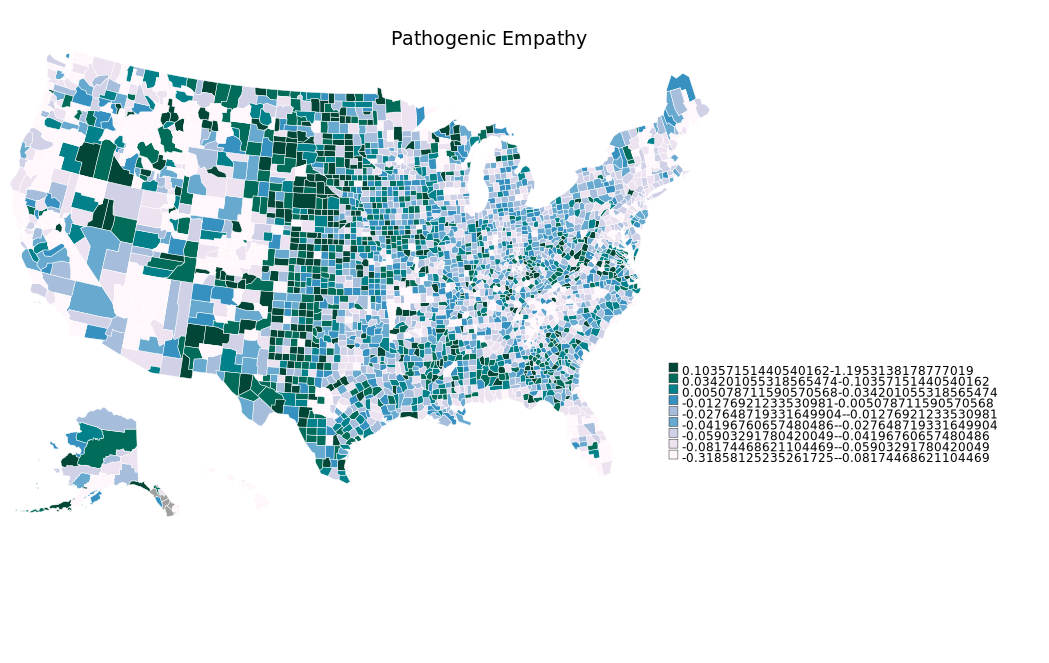

In [28]:
cg = Chorogrid('/home/sgiorgi/chorogrid-master/chorogrid/databases/usa_counties.csv', cnty_df.index, mybin.colors_out, 'fips_integer')
cg.set_title('Pathogenic Empathy', font_dict={'font-size': 19})
cg.set_legend(mybin.colors_in, mybin.labels)
cg.draw_map(spacing_dict={'legend_offset':[-300,-200], 'margin_top': 50}) # otherwise legend will be cut off
    # another strategy would be to pass a legend_offset to spacing_dict
cg.done(show=True, save_filename='path_jord_ispt')



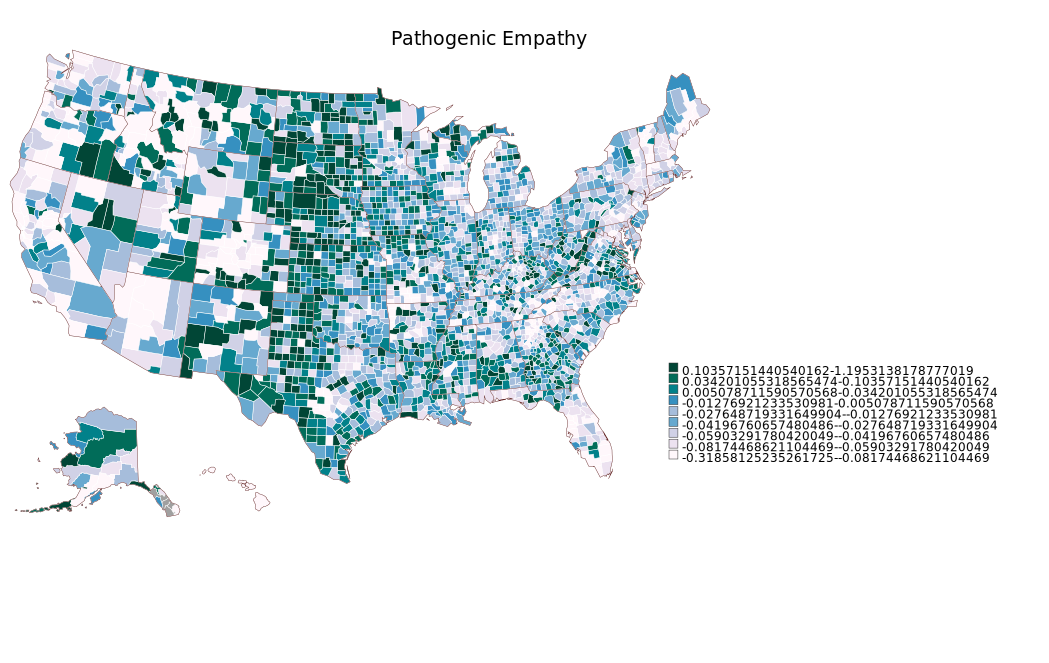

In [29]:
with open('/home/sgiorgi/chorogrid-master/chorogrid/databases/usa_counties_statelines.txt', 'r') as f:
    statelines = f.read()
cg.add_svg(statelines)
cg.done(show=True, save_filename='path_jord_ispt')

In [30]:
mybin = Colorbin(combined['sal_resid'], mycolors, proportional=False, decimals=None)
mybin.fenceposts

[-0.79067569475786148,
 -0.045591411604727169,
 -0.020565053318074469,
 -0.0080551787353847423,
 0.0022571705876942086,
 0.010914528627004198,
 0.019848659581047701,
 0.030314912422323398,
 0.048549360442288705,
 0.3940146973787238]

In [13]:
mybin.fenceposts = [-0.77, -0.07, -0.04, -0.02, 0.003, 0.13, 0.03, 0.05, 0.09, 0.54]
mybin.recalc(False)

mybin.labels

['-0.77--0.07',
 '-0.07--0.04',
 '-0.04--0.02',
 '-0.02-0.003',
 '0.003-0.13',
 '0.13-0.03',
 '0.03-0.05',
 '0.05-0.09',
 '0.09-0.54']

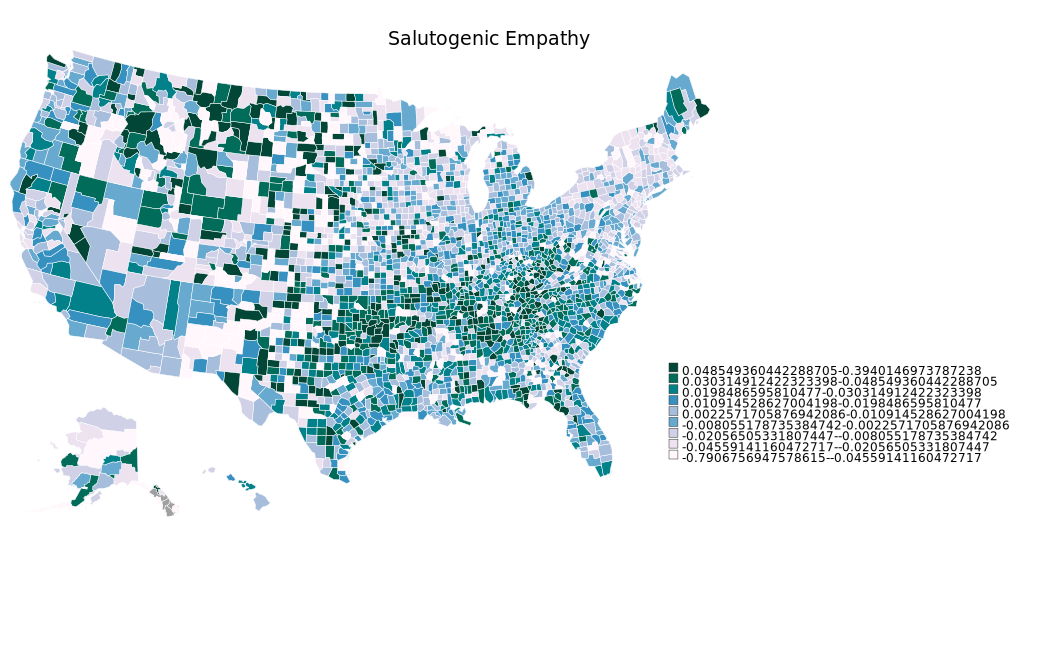

In [31]:
cg = Chorogrid('/home/sgiorgi/chorogrid-master/chorogrid/databases/usa_counties.csv', cnty_df.index, mybin.colors_out, 'fips_integer')
cg.set_title('Salutogenic Empathy', font_dict={'font-size': 19})
cg.set_legend(mybin.colors_in, mybin.labels)
cg.draw_map(spacing_dict={'legend_offset':[-300,-200], 'margin_top': 50}) # otherwise legend will be cut off
    # another strategy would be to pass a legend_offset to spacing_dict
cg.done(show=True, save_filename='sal_ec_iopt')

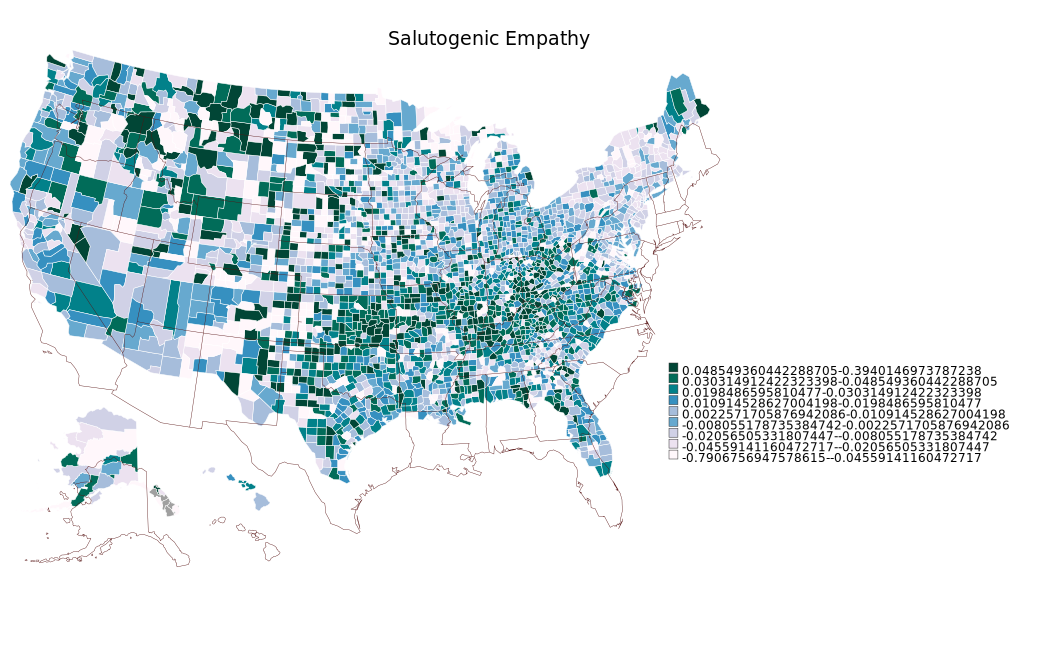

In [32]:
with open('/home/sgiorgi/chorogrid-master/chorogrid/databases/usa_counties_statelines.txt', 'r') as f:
    statelines = f.read()
cg.add_svg(statelines)
cg.done(show=True, save_filename='sal_ec_iopt')

In [1]:
import sys
sys.path.insert(0, '/home/sgiorgi/release/python3/')

In [2]:
import dlatk
from dlatk.mysqlMethods import mysql_iter_funcs as mif

In [3]:
import pandas as pd
import statsmodels.formula.api as sm
import patsy as ps

In [4]:
db = 'emp_test'
msg_tbl = "msgs_uniq_en"
out_tbl = "emp_merged_uniq"
index = "user_id"
db_eng = mif.get_db_engine(db)

In [11]:
df = cnty_df

In [12]:
y_path,X_sal = ps.dmatrices('path_jord_ispt ~ sal_ec_iopt', data=df, return_type='dataframe')
y_sal,X_path = ps.dmatrices('sal_ec_iopt ~ path_jord_ispt', data=df, return_type='dataframe')

In [19]:
model_path = sm.OLS(y_path,X_sal)
results_path = model_path.fit()
path_resid = results_path.resid.to_frame()
path_resid = path_resid.rename(index=str, columns={0: "path_resid"})
path_resid.head()

path_resid
cnty            
1001    0.006438
1003   -0.065832
1005   -0.001111
1007   -0.022569
1009   -0.057350

In [14]:
model_sal = sm.OLS(y_sal,X_path)
results_sal = model_sal.fit()
sal_resid = results_sal.resid.to_frame()
sal_resid = sal_resid.rename(index=str, columns={0: "sal_resid"})

In [20]:
combined = pd.concat([sal_resid, path_resid], axis=1)

In [21]:
combined.head()

sal_resid  path_resid
cnty                       
1001   0.014698    0.006438
1003   0.028422   -0.065832
1005   0.008036   -0.001111
1007   0.058787   -0.022569
1009   0.097268   -0.057350